### Problem Statement: Life Insurance sales

The dataset belongs to leading life insurance company. The company wants to predict the bonus for its agents so that it may design appropriate engagement activity for the higher perorming agents and upskill programs for low performing agents. 

In [56]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,roc_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

from math import sqrt
from scipy import stats

In [57]:
# Loading the data
sales = pd.read_excel('Sales.xlsx')

### EDA

In [58]:
# Check data head
sales.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


In [59]:
# Check data tail
sales.tail()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
4515,7004515,3953,4.0,8.0,Agent,Small Business,Graduate,Male,4,Senior Manager,2.0,Single,26355.0,0,2.0,636473.0,West,Yearly,9,1.0
4516,7004516,2939,9.0,9.0,Agent,Salaried,Under Graduate,Female,2,Executive,2.0,Married,20991.0,0,3.0,296813.0,North,Yearly,1,3.0
4517,7004517,3792,23.0,23.0,Agent,Salaried,Engineer,Female,5,AVP,5.0,Single,NaN,0,2.0,667371.0,North,Half Yearly,4,1.0
4518,7004518,4816,10.0,10.0,Online,Small Business,Graduate,Female,4,Executive,2.0,Single,20068.0,0,6.0,943999.0,West,Half Yearly,1,5.0
4519,7004519,4764,14.0,10.0,Agent,Salaried,Under Graduate,Female,5,Manager,2.0,Married,23820.0,0,3.0,700308.0,North,Half Yearly,1,3.0


In [60]:
# Check data info
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [61]:
# Check shape of the dataset
sales.shape

(4520, 20)

There are total no. of 4520 rows and 20 columns in the dataset.

In [62]:
# Check data summary
sales.describe().transpose

<bound method DataFrame.transpose of              CustID   AgentBonus          Age   CustTenure  ExistingProdType  \
count  4.520000e+03  4520.000000  4251.000000  4294.000000       4520.000000   
mean   7.002260e+06  4077.838274    14.494707    14.469027          3.688938   
std    1.304956e+03  1403.321711     9.037629     8.963671          1.015769   
min    7.000000e+06  1605.000000     2.000000     2.000000          1.000000   
25%    7.001130e+06  3027.750000     7.000000     7.000000          3.000000   
50%    7.002260e+06  3911.500000    13.000000    13.000000          4.000000   
75%    7.003389e+06  4867.250000    20.000000    20.000000          4.000000   
max    7.004519e+06  9608.000000    58.000000    57.000000          6.000000   

       NumberOfPolicy  MonthlyIncome    Complaint  ExistingPolicyTenure  \
count     4475.000000    4284.000000  4520.000000           4336.000000   
mean         3.565363   22890.309991     0.287168              4.130074   
std          1.45

In [63]:
# Check missing values
sales.isnull().any()

CustID                  False
AgentBonus              False
Age                      True
CustTenure               True
Channel                 False
Occupation              False
EducationField          False
Gender                  False
ExistingProdType        False
Designation             False
NumberOfPolicy           True
MaritalStatus           False
MonthlyIncome            True
Complaint               False
ExistingPolicyTenure     True
SumAssured               True
Zone                    False
PaymentMethod           False
LastMonthCalls          False
CustCareScore            True
dtype: bool

In [64]:
# Check missing values
sales.isnull().sum()

CustID                    0
AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

We can see that there are some missing values in a few columns

In [65]:
# Checking for duplicate values

dups = sales.duplicated()
print('The total no of duplicate vaules = %d' % (dups.sum()))
sales[dups]

The total no of duplicate vaules = 0


,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore


We can see that there are no any duplicate values in the dataset.

In [66]:
# let's check the summary of Agentbonus first.
sales.describe()['AgentBonus']

count    4520.000000
mean     4077.838274
std      1403.321711
min      1605.000000
25%      3027.750000
50%      3911.500000
75%      4867.250000
max      9608.000000
Name: AgentBonus, dtype: float64

#### Label encoding for the Categorical variables.

In [67]:
# Since we are quite aware that label_encoder object knows how to understand word labels.
# As we are trying to convert the labels into numeric form so as to convert them to machine readable form.

label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
sales['Channel']= label_encoder.fit_transform(sales['Channel'])
sales['Occupation']= label_encoder.fit_transform(sales['Occupation'])
sales['EducationField']= label_encoder.fit_transform(sales['EducationField'])
sales['Gender']= label_encoder.fit_transform(sales['Gender'])
sales['Designation']= label_encoder.fit_transform(sales['Designation'])
sales['MaritalStatus']= label_encoder.fit_transform(sales['MaritalStatus'])
sales['Zone']= label_encoder.fit_transform(sales['Zone'])
sales['PaymentMethod']= label_encoder.fit_transform(sales['PaymentMethod'])

In [68]:
# Check data info again
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   int32  
 5   Occupation            4520 non-null   int32  
 6   EducationField        4520 non-null   int32  
 7   Gender                4520 non-null   int32  
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   int32  
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   int32  
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [69]:
# Check missing values again
sales.isnull().sum()

CustID                    0
AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

In [70]:
# Imputing missing values with 'mean' and 'mode'

model1=sales['Age'].mode()[0]
model2=sales['CustTenure'].mode()[0]
model3=sales['MonthlyIncome'].mean()
model4=sales['ExistingPolicyTenure'].mode()[0]
model5=sales['SumAssured'].mean()
model6=sales['CustCareScore'].mode()[0]
model7=sales['NumberOfPolicy'].mode()[0]
sales['Age'].replace(np.nan,model1,inplace=True)
sales['CustTenure'].replace(np.nan,model2,inplace=True)
sales['MonthlyIncome'].replace(np.nan,model3,inplace=True)
sales['ExistingPolicyTenure'].replace(np.nan,model4,inplace=True)
sales['SumAssured'].replace(np.nan,model5,inplace=True)
sales['CustCareScore'].replace(np.nan,model6,inplace=True)
sales['NumberOfPolicy'].replace(np.nan,model7,inplace=True)

In [71]:
# Check missing values again
sales.isnull().any()

CustID                  False
AgentBonus              False
Age                     False
CustTenure              False
Channel                 False
Occupation              False
EducationField          False
Gender                  False
ExistingProdType        False
Designation             False
NumberOfPolicy          False
MaritalStatus           False
MonthlyIncome           False
Complaint               False
ExistingPolicyTenure    False
SumAssured              False
Zone                    False
PaymentMethod           False
LastMonthCalls          False
CustCareScore           False
dtype: bool

In [72]:
sales.isnull().sum()

CustID                  0
AgentBonus              0
Age                     0
CustTenure              0
Channel                 0
Occupation              0
EducationField          0
Gender                  0
ExistingProdType        0
Designation             0
NumberOfPolicy          0
MaritalStatus           0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
Zone                    0
PaymentMethod           0
LastMonthCalls          0
CustCareScore           0
dtype: int64

We can see that the missing values has been imputed and there are no missing values anymore.

In [73]:
# Check duplicate values again
sales.duplicated().sum()

0

There are no duplicate values either.

In [74]:
# Check basic data info
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4520 non-null   float64
 3   CustTenure            4520 non-null   float64
 4   Channel               4520 non-null   int32  
 5   Occupation            4520 non-null   int32  
 6   EducationField        4520 non-null   int32  
 7   Gender                4520 non-null   int32  
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   int32  
 10  NumberOfPolicy        4520 non-null   float64
 11  MaritalStatus         4520 non-null   int32  
 12  MonthlyIncome         4520 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4520 non-null   float64
 15  SumAssured           

#### Univariate Analysis

C:\Users\sangam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sangam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sangam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

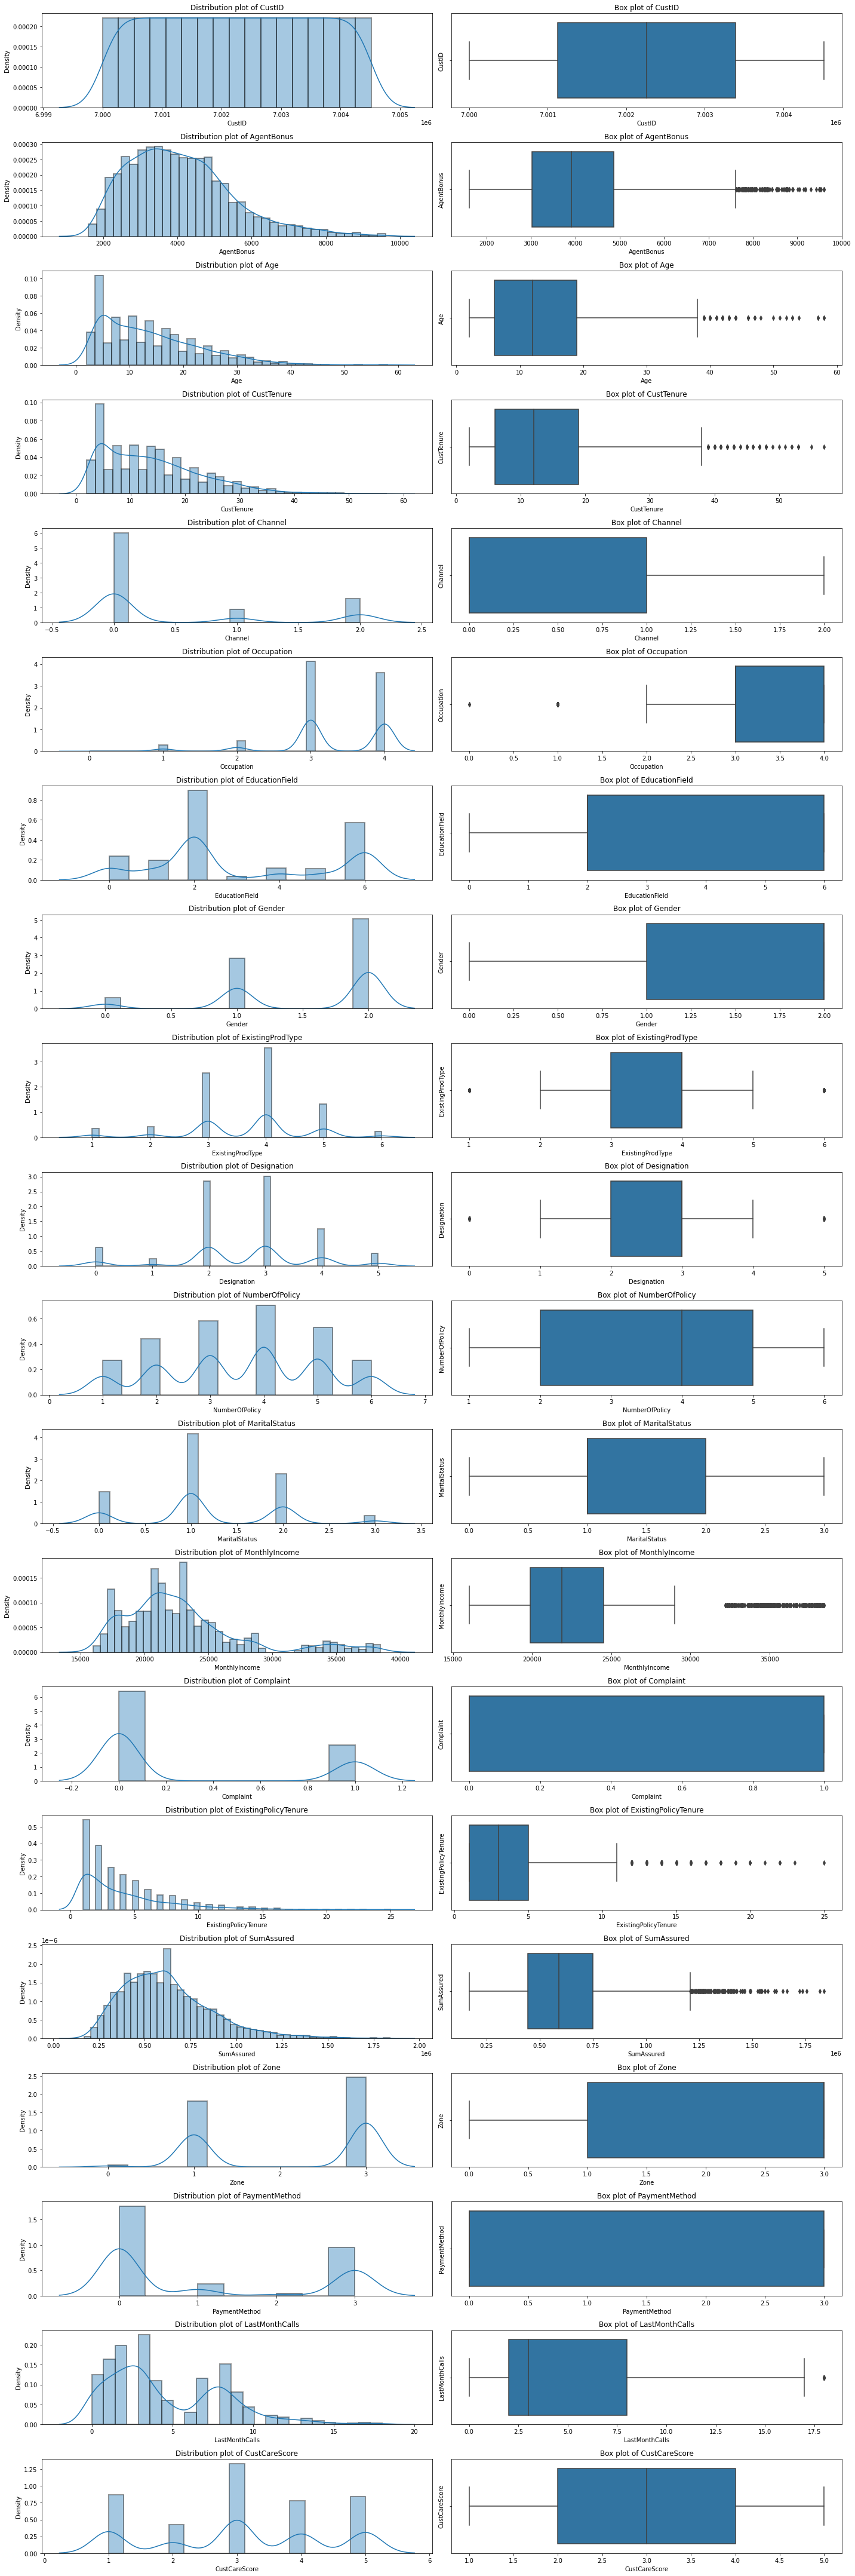

In [75]:
a = len(sales.select_dtypes(exclude= 'object').columns)  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig1 = plt.figure(figsize=(20,60))

for i in sales.select_dtypes(exclude= 'object').columns:
    plt.subplot(a, b, c)
    plt.title('Distribution plot of {}'.format(i))
    plt.xlabel(i)
    sns.distplot(sales[i], hist_kws=dict(edgecolor="k", linewidth=2))
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Box plot of {}'.format(i))
    plt.ylabel(i)
    sns.boxplot(x = sales[i], orient='h', palette='tab10')
    c = c + 1

plt.tight_layout()
plt.show()

We can see that there are some outliiers present in the boxplots to which we'll find a way to remove them. 

In [76]:
# Treating Outliers

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [77]:
for column in sales.columns:
    lr,ur=remove_outlier(sales[column])
    sales[column]=np.where(sales[column]>ur,ur,sales[column])
    sales[column]=np.where(sales[column]<lr,lr,sales[column])

C:\Users\sangam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sangam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sangam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

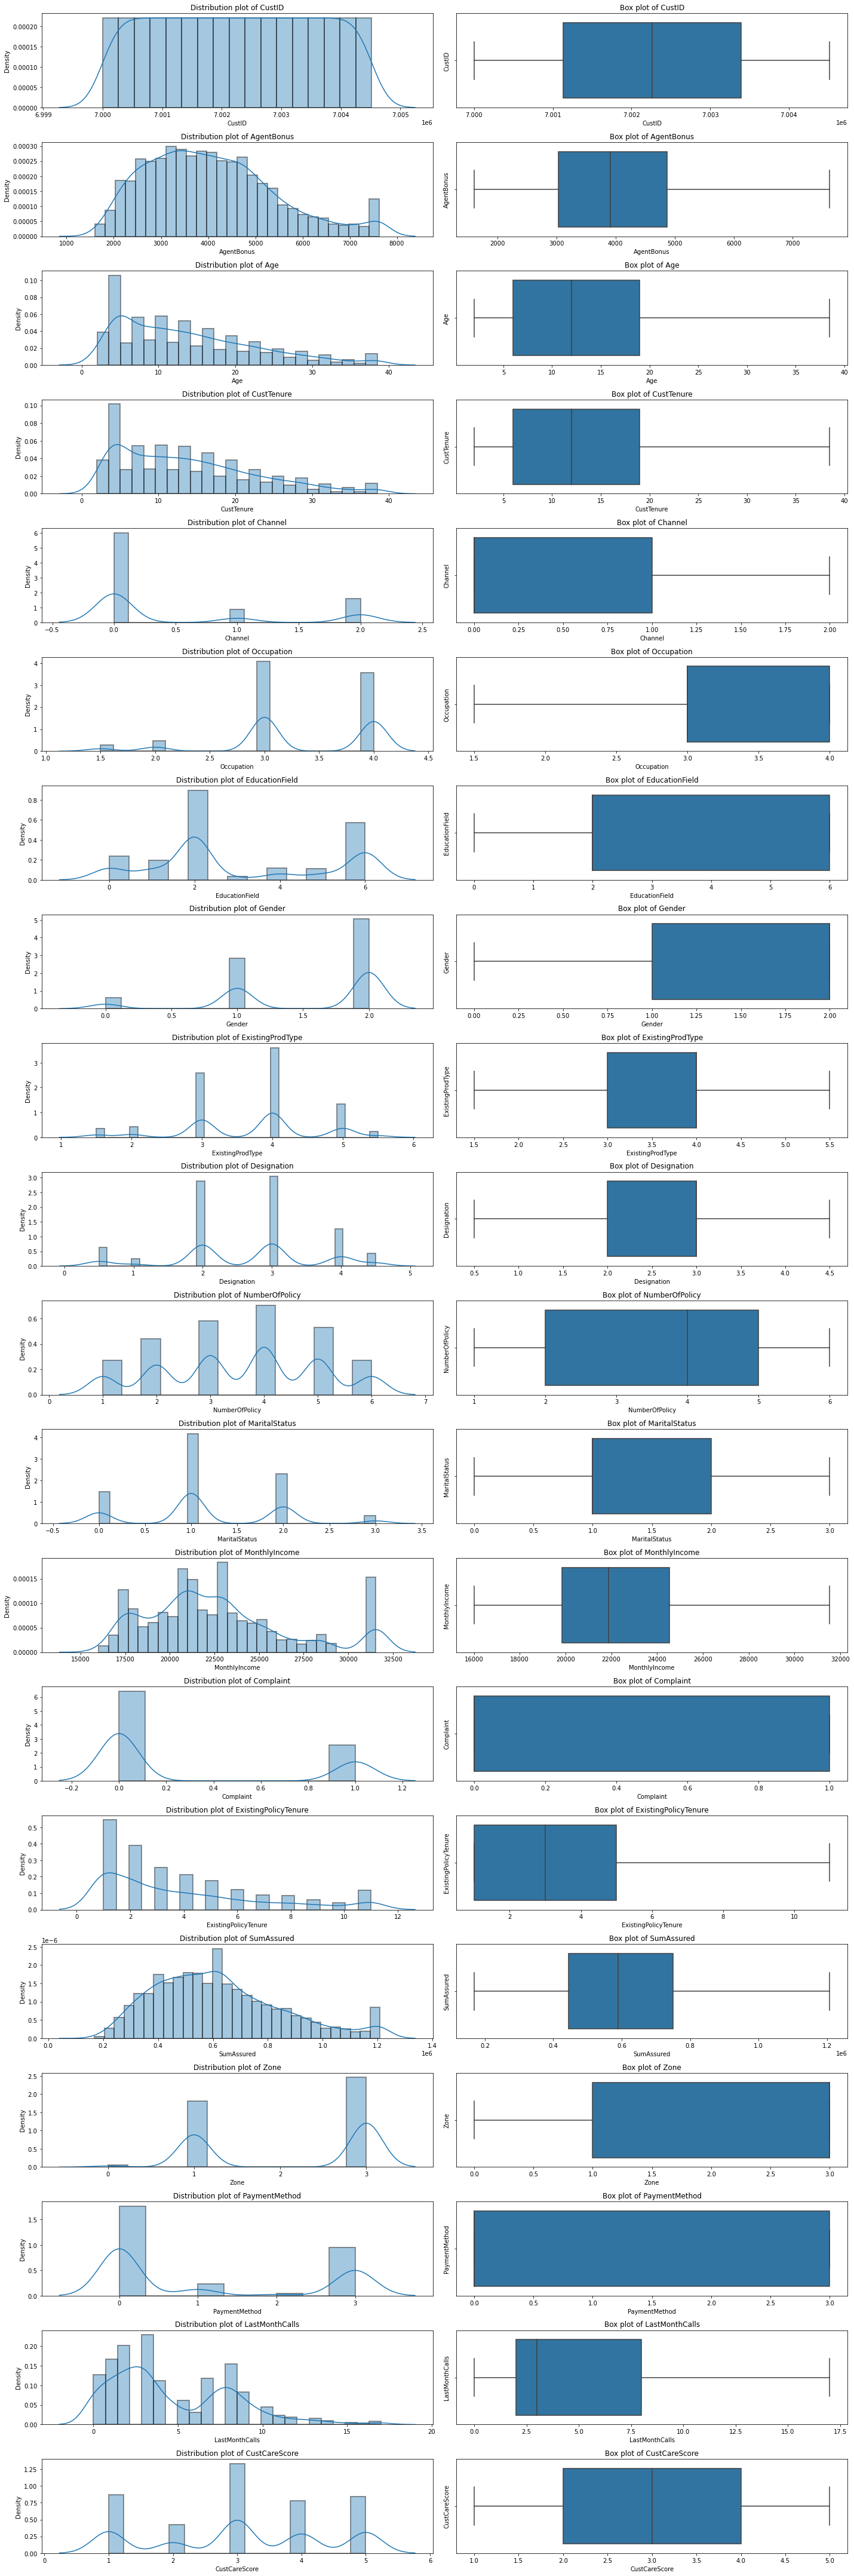

In [78]:
# Replotting the graphs to check if the Outliers has been treated.

a = len(sales.select_dtypes(exclude= 'object').columns)  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig1 = plt.figure(figsize=(20,60))

for i in sales.select_dtypes(exclude= 'object').columns:
    plt.subplot(a, b, c)
    plt.title('Distribution plot of {}'.format(i))
    plt.xlabel(i)
    sns.distplot(sales[i], hist_kws=dict(edgecolor="k", linewidth=2))
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Box plot of {}'.format(i))
    plt.ylabel(i)
    sns.boxplot(x = sales[i], orient='h', palette='tab10')
    c = c + 1

plt.tight_layout()
plt.show()


we can see that the Outliers has been treated successfully using IQR

#### Bivariate Analysis

In [79]:
# let's check the summary of Agentbonus first.
sales.describe()['AgentBonus']

count    4520.000000
mean     4062.773894
std      1358.284526
min      1605.000000
25%      3027.750000
50%      3911.500000
75%      4867.250000
max      7626.500000
Name: AgentBonus, dtype: float64

<AxesSubplot:xlabel='AgentBonus', ylabel='Age'>

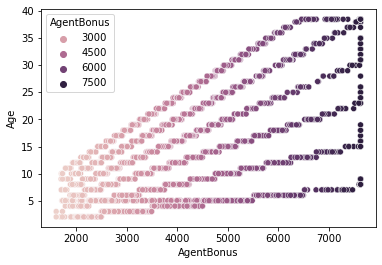

In [80]:
# Now using the scatterplots describing it.
sns.scatterplot(x='AgentBonus',y='Age',data=sales,hue='AgentBonus')

#### Checking Correlations using Heatmap

In [81]:
Corr_Matrix = sales.corr()
print(Corr_Matrix)

                        CustID  AgentBonus       Age  CustTenure   Channel  \
CustID                1.000000    0.194469  0.137151    0.153822 -0.003346   
AgentBonus            0.194469    1.000000  0.560300    0.559312 -0.035635   
Age                   0.137151    0.560300  1.000000    0.331396 -0.026437   
CustTenure            0.153822    0.559312  0.331396    1.000000 -0.036903   
Channel              -0.003346   -0.035635 -0.026437   -0.036903  1.000000   
Occupation            0.002776    0.024176  0.015726    0.027638  0.007956   
EducationField        0.018621    0.008868  0.004500    0.006645  0.017410   
Gender                0.085549    0.043575  0.022354    0.037631 -0.013682   
ExistingProdType      0.426252    0.112871  0.098994    0.113379  0.005767   
Designation           0.023020    0.153557  0.120095    0.109045 -0.000582   
NumberOfPolicy        0.254446    0.079161  0.065757    0.061891 -0.018514   
MaritalStatus         0.077783   -0.084234 -0.057079   -0.065455

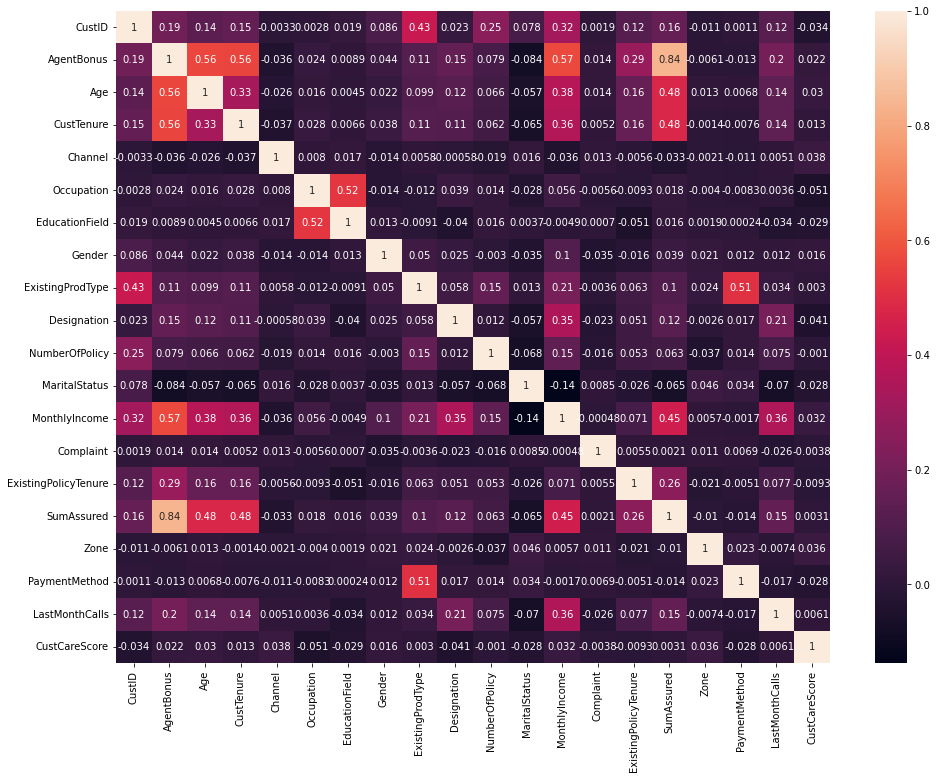

In [82]:
plt.figure(figsize=(16,12))
sns.heatmap(sales.corr(), annot=True)
plt.show()

C:\Users\sangam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sangam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sangam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sangam\ana

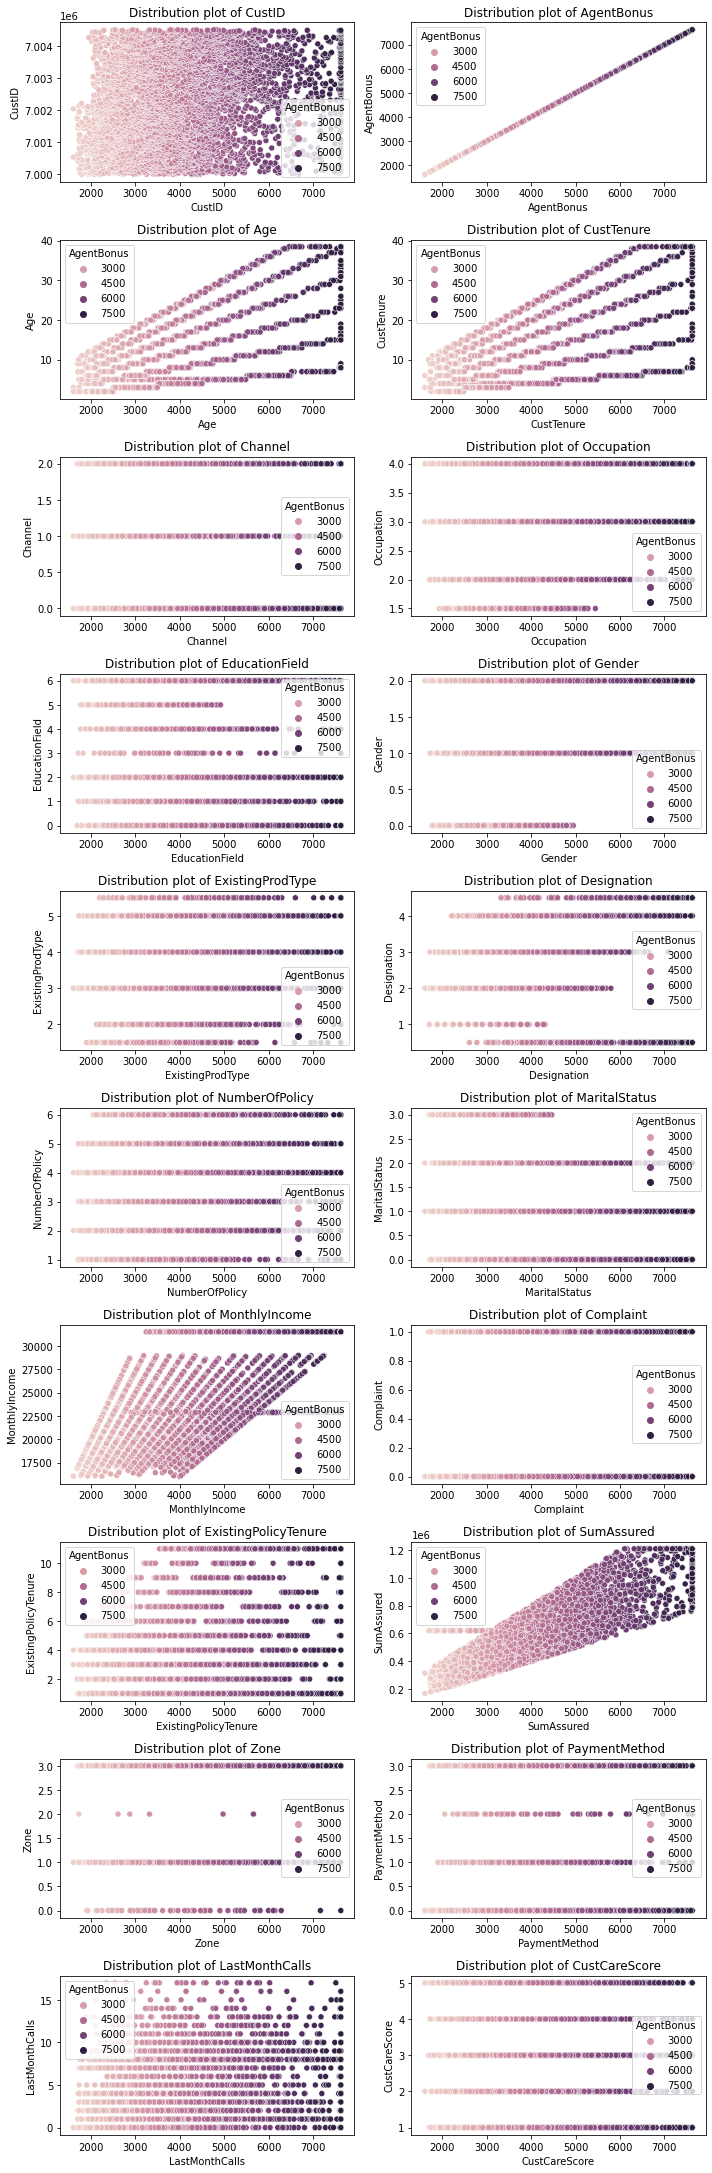

In [83]:
# Bivariate Analysis with Target Variable

a = len(sales.select_dtypes(exclude= 'object').columns)  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig1 = plt.figure(figsize=(10,60))

for i in sales.select_dtypes(exclude= 'object').columns:
    plt.subplot(a, b, c)
    plt.title('Distribution plot of {}'.format(i))
    plt.xlabel(i)
    sns.scatterplot('AgentBonus',sales[i],data=sales,hue='AgentBonus')
    c = c + 1
plt.tight_layout();

#### Examining all variables in the dataset

In [84]:
sales.describe()["Age"]

count    4520.000000
mean       13.855863
std         8.800660
min         2.000000
25%         6.000000
50%        12.000000
75%        19.000000
max        38.500000
Name: Age, dtype: float64

C:\Users\sangam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

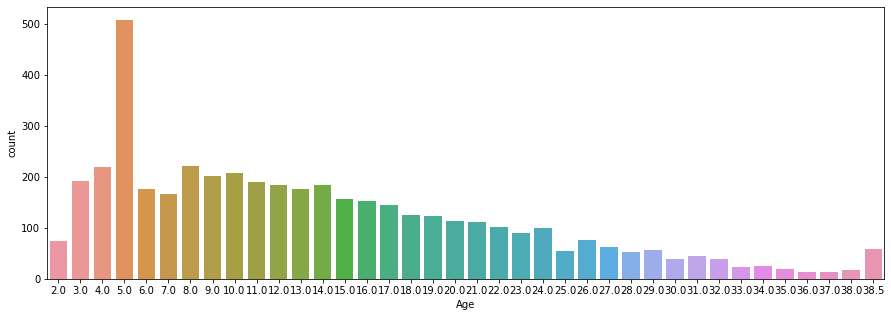

In [85]:
# Plotting the graphs for the same

plt.figure(figsize=(15,5))
sns.countplot(sales['Age'])

In [86]:
# Describing the Customer tenure
sales.describe()["CustTenure"]

count    4520.000000
mean       13.865265
std         8.765148
min         2.000000
25%         6.000000
50%        12.000000
75%        19.000000
max        38.500000
Name: CustTenure, dtype: float64

C:\Users\sangam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CustTenure', ylabel='count'>

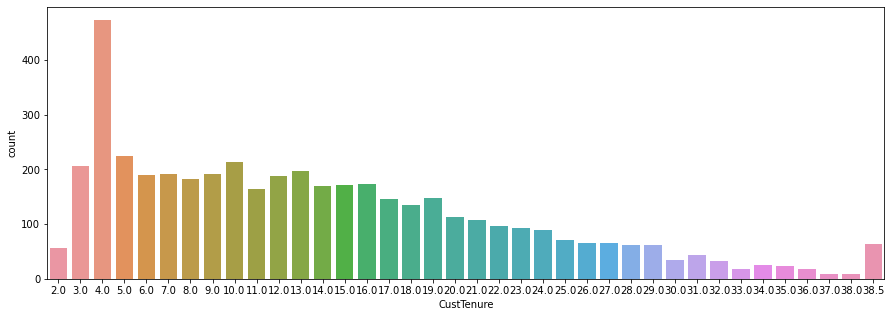

In [87]:
# Plotting the graph for the same variable 'Customer tenure'
plt.figure(figsize=(15,5))
sns.countplot(sales['CustTenure'])

In [88]:
# Describing the Zonal area of population
sales.describe()["Zone"]

count    4520.000000
mean        2.122566
std         1.013092
min         0.000000
25%         1.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: Zone, dtype: float64

C:\Users\sangam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Zone', ylabel='count'>

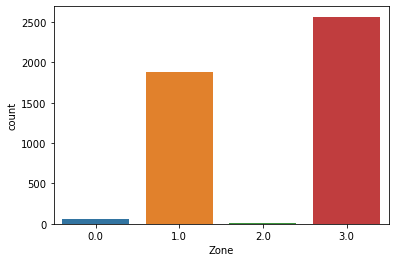

In [89]:
# Plotting the graphs for the same variable 'zone'
plt.figure(figsize=(6,4))
sns.countplot(sales['Zone'])

In [90]:
# Describing the 'Channel' variable
sales.describe()["Channel"]

count    4520.000000
mean        0.483186
std         0.793412
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Channel, dtype: float64

C:\Users\sangam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Channel', ylabel='count'>

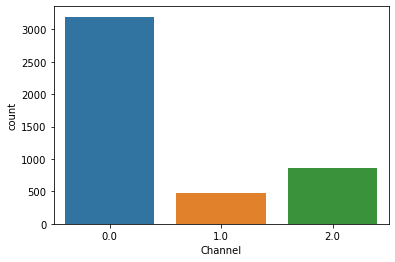

In [91]:
# Ploting the countplots for the same variable.
plt.figure(figsize=(6,4))
sns.countplot(sales["Channel"])

In [92]:
# Describing the payment method variable
sales.describe()['PaymentMethod']

count    4520.000000
mean        1.063717
std         1.367408
min         0.000000
25%         0.000000
50%         0.000000
75%         3.000000
max         3.000000
Name: PaymentMethod, dtype: float64

C:\Users\sangam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


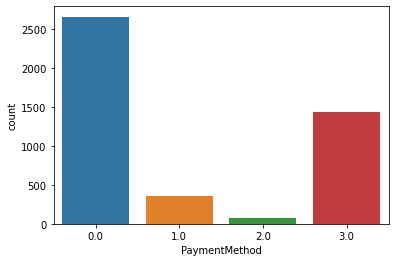

In [93]:
# Ploting the graphs using countplots to show the same whether they are going for yearly payment or half yearly.
plt.figure(figsize=(6,4))
sns.countplot(sales['PaymentMethod'])
labels = ["Half Yearly 0","Monthly 1"]

#### Now Clustering using Kmeans

In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [95]:
X=StandardScaler()

In [96]:
scaled_sales = X.fit_transform(sales)

In [97]:
# Scaled data are now below:-
scaled_sales

array([[-1.73166765,  0.25492775,  0.92550313, ..., -0.77799336,
         0.104054  , -0.7759467 ],
       [-1.73090126, -1.36126003, -0.32454144, ...,  1.41618093,
         0.65802815, -0.04859724],
       [-1.73013486,  0.15479037,  1.38006478, ...,  1.41618093,
        -1.28088139, -0.04859724],
       ...,
       [ 1.73013486, -0.19937196,  1.03914354, ..., -0.77799336,
        -0.17293308, -1.50329615],
       [ 1.73090126,  0.55460357, -0.43818185, ..., -0.77799336,
        -1.00389432,  1.40610167],
       [ 1.73166765,  0.51631575,  0.01637981, ..., -0.77799336,
        -1.00389432, -0.04859724]])

In [98]:
k_means = KMeans(n_clusters=2)

In [99]:
# fitting the scaled data
k_means.fit(scaled_sales)

KMeans(n_clusters=2)

In [100]:
# Checking the labels
k_means.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [101]:
# Checking inertia
k_means.inertia_

80017.97762049144

In [102]:
# Now doing K_means using different clusterrs.

k_means=KMeans(n_clusters=2)
k_means.fit(scaled_sales)
k_means.inertia_

80017.9770248473

In [103]:
# Now doing K_means using cluster = 3

k_means=KMeans(n_clusters=3)
k_means.fit(scaled_sales)
k_means.inertia_

75917.86939717668

In [104]:
# Similarly using cluster = 4

k_means=KMeans(n_clusters=4)
k_means.fit(scaled_sales)
k_means.inertia_

72860.73479271357

In [105]:
wss=[]

In [106]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_sales)
    wss.append(KM.inertia_)

In [107]:
wss

[90399.99999999994,
 80018.12711548278,
 75801.60603512645,
 72858.99311114934,
 70720.26042022005,
 69039.42716294952,
 67260.72582398976,
 66037.320385231,
 65059.897327223836,
 63961.15953838255]

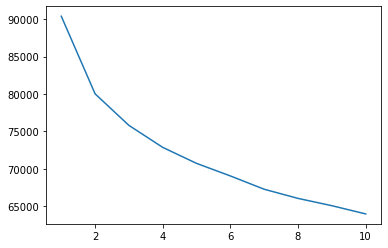

In [108]:
plt.plot(range(1,11),wss)

In [109]:
k_means=KMeans(n_clusters=3)
k_means.fit(scaled_sales)
labels=k_means.labels_

In [110]:
sales['Clus_kmeans'] = labels
sales.head(10)

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,...,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore,Clus_kmeans
0,7000000.0,4409.0,22.0,4.0,0.0,3.0,2.0,1.0,3.0,3.0,...,2.0,20993.000,1.0,2.0,806761.000000,1.0,0.0,5.0,2.0,2
1,7000001.0,2214.0,11.0,2.0,2.0,3.0,2.0,2.0,4.0,3.0,...,0.0,20130.000,0.0,3.0,294502.000000,1.0,3.0,7.0,3.0,1
2,7000002.0,4273.0,26.0,4.0,0.0,1.5,4.0,2.0,4.0,1.0,...,3.0,17090.000,1.0,2.0,619999.699267,1.0,3.0,0.0,3.0,1
3,7000003.0,1791.0,11.0,4.0,2.0,3.0,2.0,0.0,3.0,2.0,...,0.0,17909.000,1.0,2.0,268635.000000,3.0,0.0,0.0,5.0,2
4,7000004.0,2955.0,6.0,4.0,0.0,4.0,5.0,2.0,3.0,2.0,...,0.0,18468.000,0.0,4.0,366405.000000,3.0,0.0,2.0,5.0,2
5,7000005.0,3252.0,7.0,4.0,2.0,3.0,2.0,2.0,3.0,2.0,...,2.0,18068.000,0.0,2.0,487836.000000,1.0,0.0,6.0,5.0,2
6,7000006.0,3850.0,12.0,23.0,0.0,3.0,2.0,2.0,4.0,4.5,...,0.0,31542.375,0.0,2.0,392689.000000,1.0,3.0,9.0,2.0,1
7,7000007.0,2073.0,6.0,4.0,0.0,4.0,6.0,1.0,3.0,2.0,...,3.0,17279.000,0.0,2.0,369079.000000,3.0,0.0,3.0,3.0,2
8,7000008.0,2719.0,8.0,11.0,0.0,3.0,2.0,2.0,4.0,3.0,...,0.0,20916.000,1.0,1.0,405143.000000,3.0,3.0,1.0,4.0,1
9,7000009.0,3247.0,6.0,3.0,1.0,4.0,6.0,2.0,2.0,1.0,...,1.0,17089.000,0.0,1.0,619999.699267,3.0,2.0,2.0,4.0,2
